<a href="https://colab.research.google.com/github/Shirley31415926/API_heatwave/blob/main/temperature_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Package installation and code initialization

In [ ]:
# ignore these if you don't wanna permanently store the data that we will collect later on
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# package for scrapping blusesky posts (bluesky is under atproto, an open-source framework for building social apps)
!pip install --upgrade atproto
!pip install pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.0/357.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.4/682.4 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1


## 2. 2023 Post Frequency and Temperature Statistics  

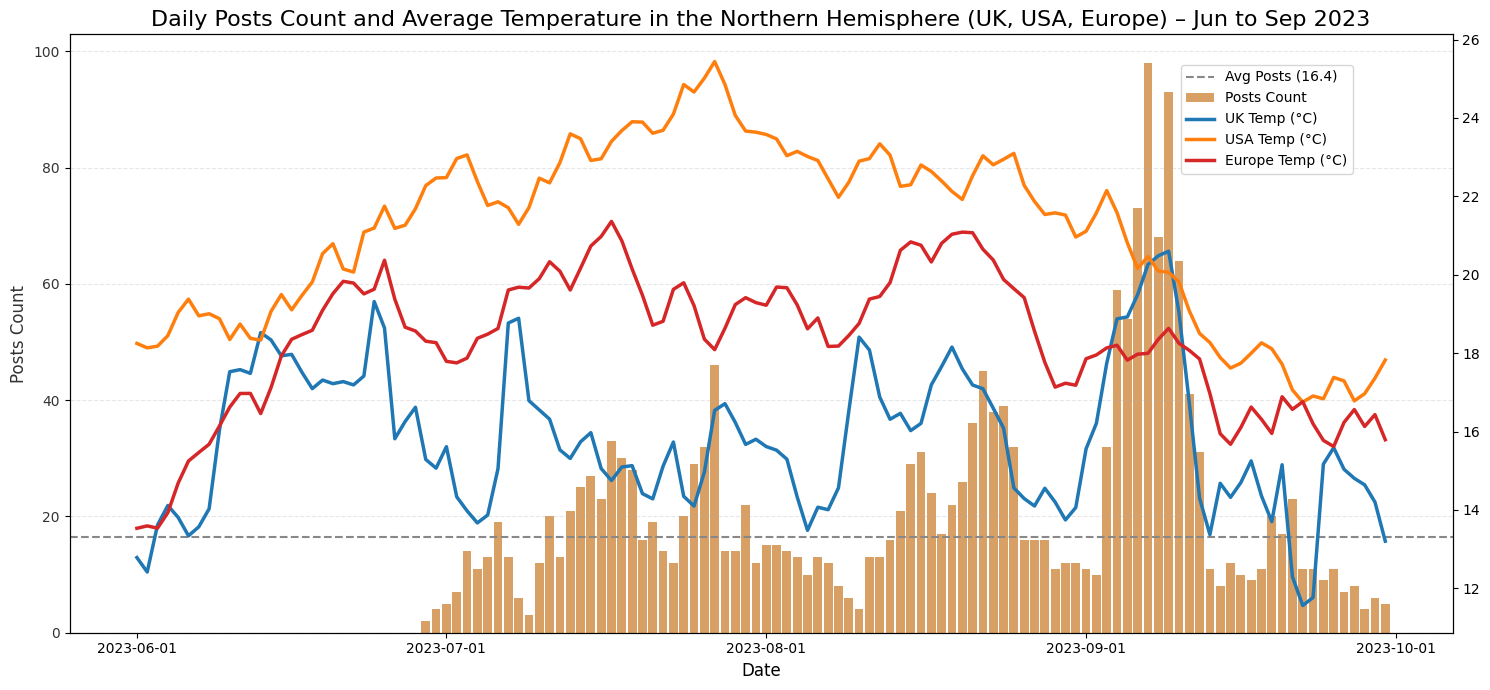

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict

# 1. Load daily post frequency data
def load_posts_data(filepath):
    daily_counts = defaultdict(int)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%f%z")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError, ValueError):
                continue
    return daily_counts

# 2. Load temperature data (supports dayfirst format for EU/UK vs US)
def load_temperature_data(filepath, region_name, dayfirst=False):
    df_temp = pd.read_csv(filepath, parse_dates=['date'], dayfirst=dayfirst)
    df_temp.set_index('date', inplace=True)
    df_temp = df_temp.rename(columns={'avg_temp': region_name})
    df_temp = df_temp.sort_index()
    return df_temp.loc['2023-06-01':'2023-09-30']

# 3. File paths for posts and temperature datasets
posts_filepath = '/content/heat_posts2023.jsonl'
uk_filepath = '/content/uk_avg_temperature_2023_Jun-Oct.csv'
usa_filepath = '/content/usa_avg_temperature_2023_Jun-Oct.csv'
europe_filepath = '/content/europe_avg_temperature_2023_Jun-Oct.csv'

# Process post frequency data
daily_counts = load_posts_data(posts_filepath)
df_posts = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['posts_count'])
df_posts.index = pd.to_datetime(df_posts.index)
full_date_range = pd.date_range(start='2023-06-01', end='2023-09-30', freq='D')
df_posts = df_posts.reindex(full_date_range, fill_value=0)
posts_avg = df_posts['posts_count'].mean()

# Load temperature data (USA file uses month/day format, hence dayfirst=True)
df_uk = load_temperature_data(uk_filepath, 'UK')
df_usa = load_temperature_data(usa_filepath, 'USA', dayfirst=True)
df_eu = load_temperature_data(europe_filepath, 'Europe')

# Merge all temperature data into one DataFrame
df_temp_all = pd.concat([df_uk, df_usa, df_eu], axis=1)

# 4. Visualization
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar chart: Daily post count (soft reddish-orange tone)
ax1.bar(df_posts.index, df_posts['posts_count'], color='#D9A066', label='Posts Count', width=0.85)
ax1.axhline(posts_avg, color='#888888', linestyle='--', linewidth=1.5, label=f'Avg Posts ({posts_avg:.1f})')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Posts Count', color='#333333', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#333333')

# Line plots for temperatures in UK, USA, and Europe
ax2 = ax1.twinx()
ax2.plot(df_temp_all.index, df_temp_all['UK'], color='#1f77b4', linewidth=2.5, label='UK Temp (°C)')
ax2.plot(df_temp_all.index, df_temp_all['USA'], color='#ff7f0e', linewidth=2.5, label='USA Temp (°C)')
ax2.plot(df_temp_all.index, df_temp_all['Europe'], color='#d62728', linewidth=2.5, label='Europe Temp (°C)')

# Title and legend
plt.title('Daily Posts Count and Average Temperature in the Northern Hemisphere (UK, USA, Europe) – Jun to Sep 2023', fontsize=16)
fig.legend(loc='upper right', bbox_to_anchor=(0.91, 0.91))

# Format x-axis to show dates nicely
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Add grid and tidy up layout
ax1.grid(axis='y', linestyle='--', alpha=0.3)
fig.tight_layout()

# Show the plot
plt.show()

# 3.2024 Post Frequency and Temperature Statistics  



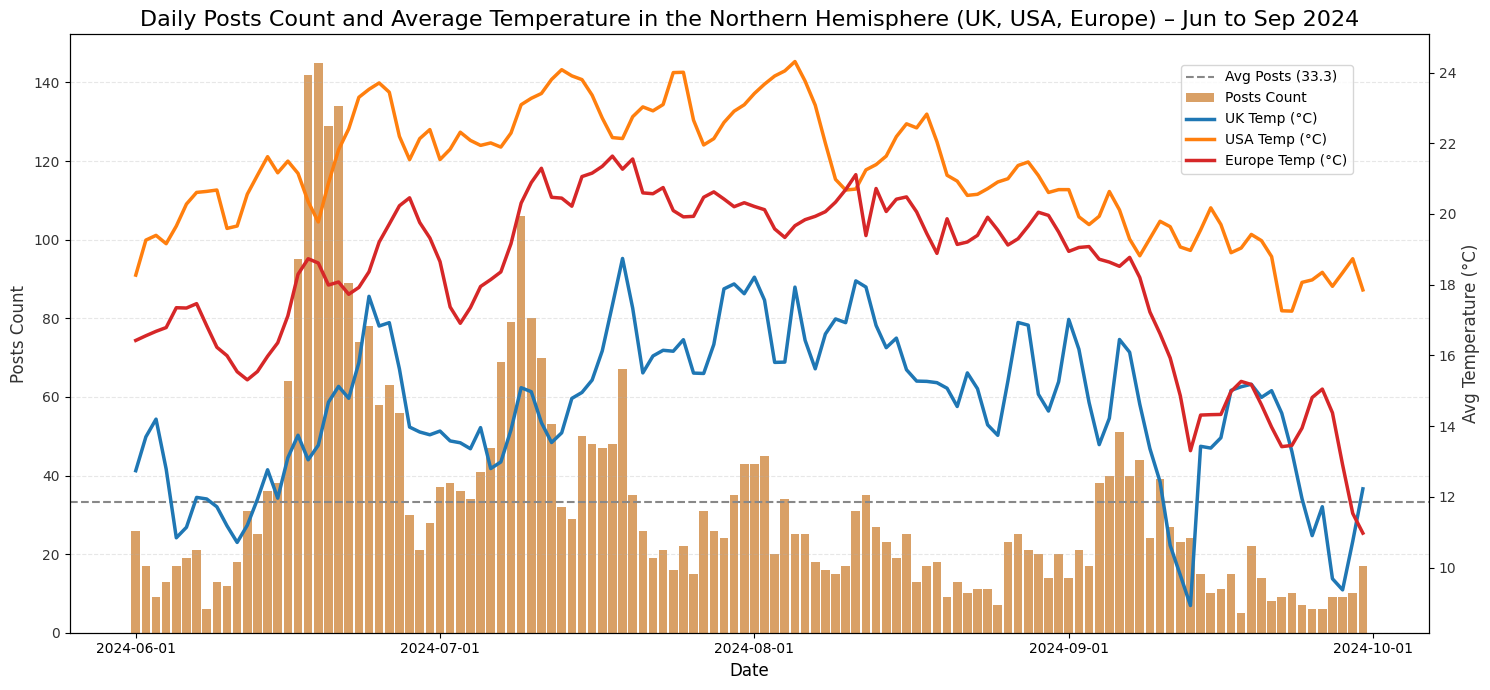

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict

# 1. Load daily post frequency data
def load_posts_data(filepath):
    daily_counts = defaultdict(int)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%f%z")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError, ValueError):
                continue
    return daily_counts

# 2. Load temperature data (supports day-first format for regions like the USA)
def load_temperature_data(filepath, region_name, dayfirst=False):
    df_temp = pd.read_csv(filepath, parse_dates=['date'], dayfirst=dayfirst)
    df_temp.set_index('date', inplace=True)
    df_temp = df_temp.rename(columns={'avg_temp': region_name})
    df_temp = df_temp.sort_index()
    return df_temp.loc['2024-06-01':'2024-09-30']

# 3. File paths
posts_filepath = '/content/heat_posts2024_standardized.jsonl'
uk_filepath = '/content/uk_avg_temperature_2024_Jun-Oct.csv'
usa_filepath = '/content/usa_avg_temperature_2024_Jun-Oct.csv'
europe_filepath = '/content/europe_avg_temperature_2024_Jun-Oct.csv'

# Process post data
daily_counts = load_posts_data(posts_filepath)
df_posts = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['posts_count'])
df_posts.index = pd.to_datetime(df_posts.index)
full_date_range = pd.date_range(start='2024-06-01', end='2024-09-30', freq='D')
df_posts = df_posts.reindex(full_date_range, fill_value=0)
posts_avg = df_posts['posts_count'].mean()

# Load temperature data (USA uses dayfirst format)
df_uk = load_temperature_data(uk_filepath, 'UK')
df_usa = load_temperature_data(usa_filepath, 'USA', dayfirst=True)
df_eu = load_temperature_data(europe_filepath, 'Europe')

# Combine all temperature data
df_temp_all = pd.concat([df_uk, df_usa, df_eu], axis=1)

# Visualization
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar chart: post counts (soft reddish-orange tone)
ax1.bar(df_posts.index, df_posts['posts_count'], color='#D9A066', label='Posts Count', width=0.85)
ax1.axhline(posts_avg, color='#888888', linestyle='--', linewidth=1.5, label=f'Avg Posts ({posts_avg:.1f})')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Posts Count', color='#333333', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#333333')

# Line charts: temperature — UK as the main focus (deep tone), Europe & USA as secondary with less emphasis
ax2 = ax1.twinx()
ax2.plot(df_temp_all.index, df_temp_all['UK'], color='#1f77b4', linewidth=2.5, label='UK Temp (°C)')
ax2.plot(df_temp_all.index, df_temp_all['USA'], color='#ff7f0e', linewidth=2.5, label='USA Temp (°C)')
ax2.plot(df_temp_all.index, df_temp_all['Europe'], color='#d62728', linewidth=2.5, label='Europe Temp (°C)')
ax2.set_ylabel('Avg Temperature (°C)', color='#333333', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#333333')

# Add a professional-looking title
plt.title(
    'Daily Posts Count and Average Temperature in the Northern Hemisphere (UK, USA, Europe) – Jun to Sep 2024',
    fontsize=16,
    fontweight='bold'
)

# Add legend
fig.legend(loc='upper right', bbox_to_anchor=(0.91, 0.91))

# Beautify x-axis date formatting
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Add grid and tidy layout
ax1.grid(axis='y', linestyle='--', alpha=0.3)
fig.tight_layout()

# Show the final plot
plt.show()


# 4. 2023: Temperature vs. Post Frequency


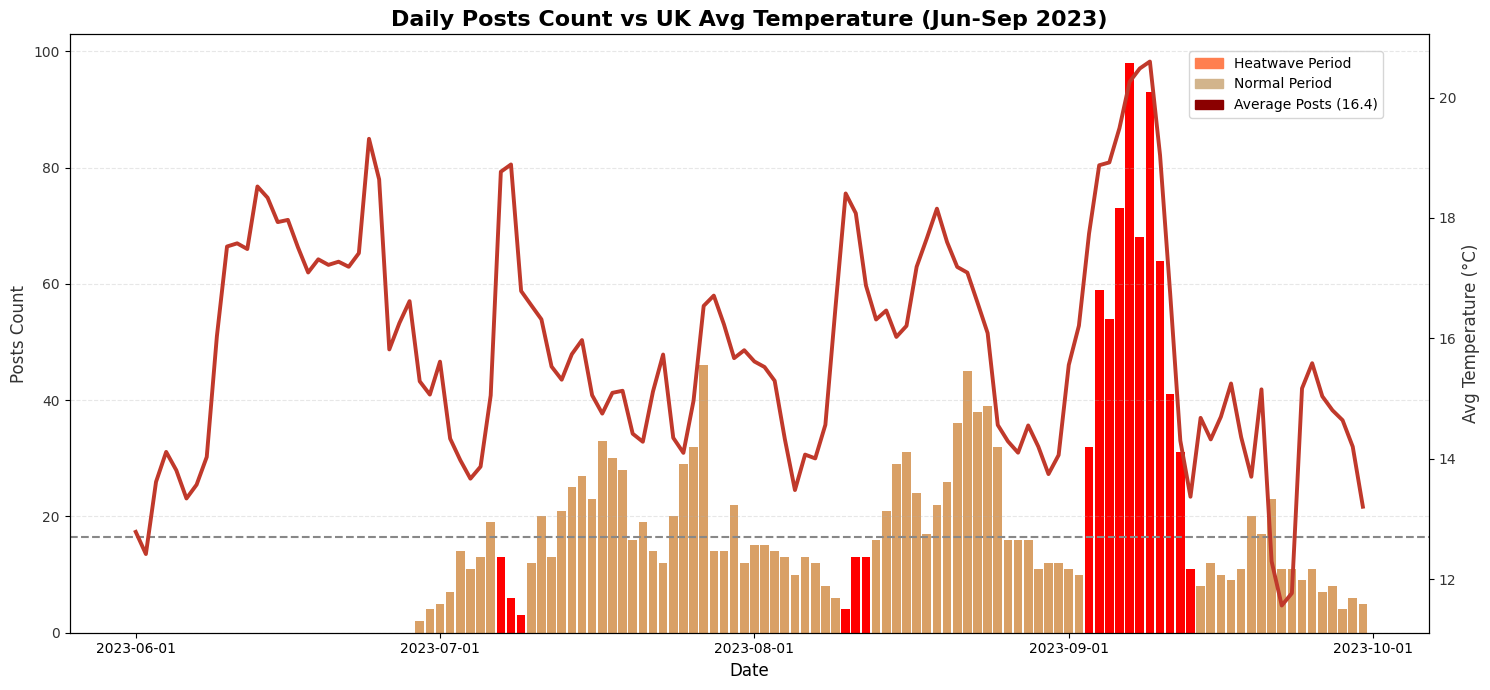

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict
import matplotlib.patches as mpatches  # For custom legend patches

# 1. Load daily post frequency data
def load_posts_data(filepath):
    daily_counts = defaultdict(int)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%f%z")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError, ValueError):
                continue
    return daily_counts

# 2. Load temperature data (UK only)
def load_temperature_data(filepath, region_name):
    df_temp = pd.read_csv(filepath, parse_dates=['date'])
    df_temp.set_index('date', inplace=True)
    df_temp = df_temp.rename(columns={'avg_temp': region_name})
    df_temp = df_temp.sort_index()
    return df_temp.loc['2023-06-01':'2023-09-30']

# 3. File paths
posts_filepath = '/content/heat_posts2023.jsonl'
uk_filepath = '/content/uk_avg_temperature_2023_Jun-Oct.csv'

# Heatwave periods from the UKHSA report:
# https://www.gov.uk/government/publications/heat-mortality-monitoring-reports/heat-mortality-monitoring-report-2023

# 4. Process post data
daily_counts = load_posts_data(posts_filepath)
df_posts = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['posts_count'])
df_posts.index = pd.to_datetime(df_posts.index)
full_date_range = pd.date_range(start='2023-06-01', end='2023-09-30', freq='D')
df_posts = df_posts.reindex(full_date_range, fill_value=0)
posts_avg = df_posts['posts_count'].mean()

# 5. Load UK temperature data
df_uk = load_temperature_data(uk_filepath, 'UK')

# 6. Define heatwave periods
heatwave_periods = [
    ("2023-06-08", "2023-06-14"),  # E1
    ("2023-06-23", "2023-06-26"),  # E2
    ("2023-07-07", "2023-07-09"),  # E3
    ("2023-08-10", "2023-08-12"),  # E4
    ("2023-09-03", "2023-09-13"),  # E5
]

# Generate a set of all heatwave dates
heatwave_dates = set()
for start, end in heatwave_periods:
    heatwave_dates.update(pd.date_range(start=start, end=end))

# 7. Set bar colors: red for heatwave dates, tan for normal days
bar_colors = ['#FF0000' if date in heatwave_dates else '#D9A066' for date in df_posts.index]

# 8. Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar chart: daily post counts with color highlighting
ax1.bar(df_posts.index, df_posts['posts_count'], color=bar_colors, label='Posts Count', width=0.85)
ax1.axhline(posts_avg, color='#888888', linestyle='--', linewidth=1.5, label=f'Avg Posts ({posts_avg:.1f})')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Posts Count', color='#333333', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#333333')

# Line chart: UK average temperature
ax2 = ax1.twinx()
ax2.plot(df_uk.index, df_uk['UK'], color='#C0392B', linewidth=2.8, label='UK Temp (°C)')
ax2.set_ylabel('Avg Temperature (°C)', color='#333333', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#333333')

# Title and legend
plt.title('Daily Posts Count vs UK Avg Temperature (Jun–Sep 2023)', fontsize=16, fontweight='bold')

# Custom legend patches
heat_patch = mpatches.Patch(color='#FF0000', label='Heatwave Period')
normal_patch = mpatches.Patch(color='#D9A066', label='Normal Period')
avg_line = mpatches.Patch(color='#888888', label=f'Average Posts ({posts_avg:.1f})')
fig.legend(handles=[heat_patch, normal_patch, avg_line], loc='upper right', bbox_to_anchor=(0.93, 0.93))

# Beautify x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Grid and layout
ax1.grid(axis='y', linestyle='--', alpha=0.3)
fig.tight_layout()

# Show the plot
plt.show()

# 5. 2024: Temperature vs. Post Frequency

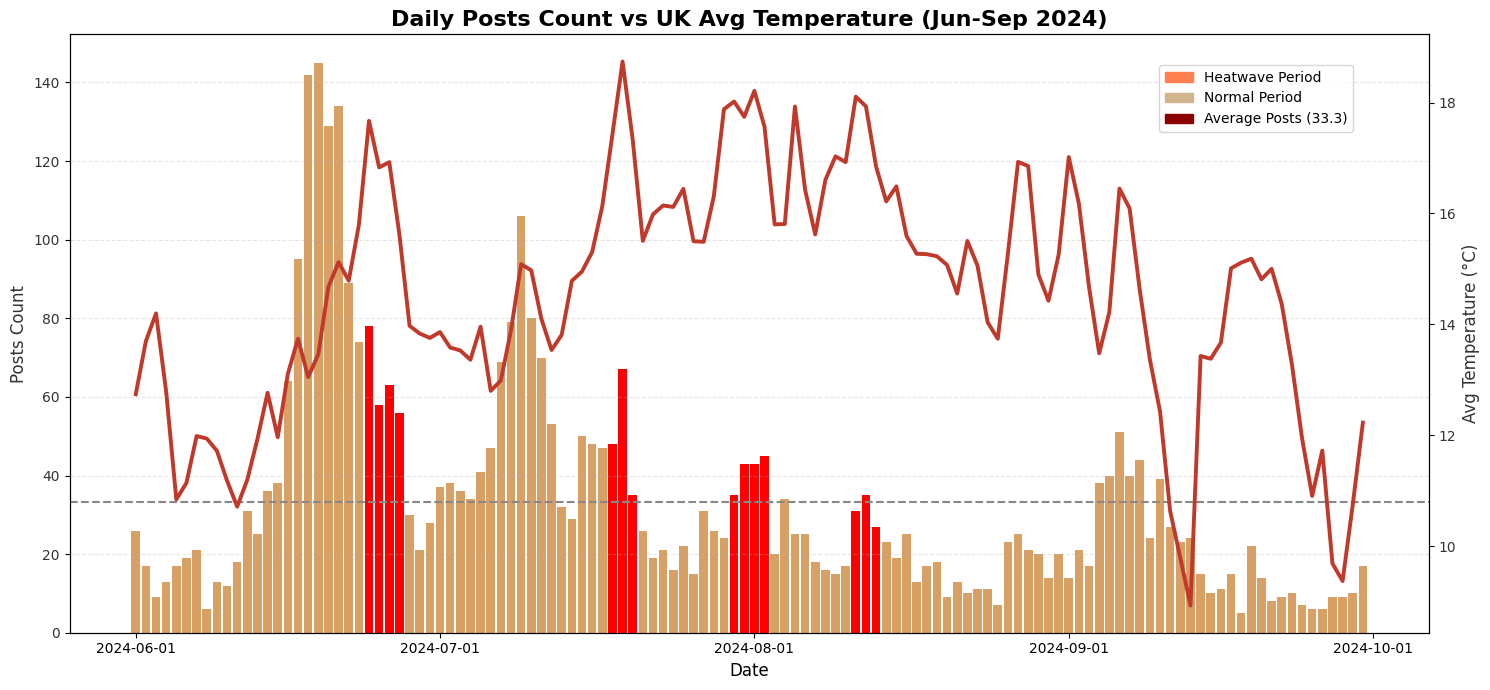

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict
import matplotlib.patches as mpatches

# 1. Load daily post frequency data
def load_posts_data(filepath):
    daily_counts = defaultdict(int)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%f%z")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError, ValueError):
                continue
    return daily_counts

# 2. Load temperature data (UK only)
def load_temperature_data(filepath, region_name):
    df_temp = pd.read_csv(filepath, parse_dates=['date'])
    df_temp.set_index('date', inplace=True)
    df_temp = df_temp.rename(columns={'avg_temp': region_name})
    df_temp = df_temp.sort_index()
    return df_temp.loc['2024-06-01':'2024-09-30']

# 3. File paths
posts_filepath = '/content/heat_posts2024_standardized.jsonl'
uk_filepath = '/content/uk_avg_temperature_2024_Jun-Oct.csv'

# 4. Process post data
daily_counts = load_posts_data(posts_filepath)
df_posts = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['posts_count'])
df_posts.index = pd.to_datetime(df_posts.index)
full_date_range = pd.date_range(start='2024-06-01', end='2024-09-30', freq='D')
df_posts = df_posts.reindex(full_date_range, fill_value=0)
posts_avg = df_posts['posts_count'].mean()

# 5. Load UK temperature data
df_uk = load_temperature_data(uk_filepath, 'UK')

# 6. Official heatwave periods (UK definition for 2024)
heatwave_periods = [
    ("2024-06-24", "2024-06-27"),
    ("2024-07-18", "2024-07-20"),
    ("2024-07-30", "2024-08-02"),
    ("2024-08-11", "2024-08-13"),
]
heatwave_dates = set()
for start, end in heatwave_periods:
    heatwave_dates.update(pd.date_range(start=start, end=end))

# 7. Set bar colors: red for heatwave days, brown for normal days
bar_colors = ['#FF0000' if date in heatwave_dates else '#D9A066' for date in df_posts.index]

# 8. Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar chart: daily post counts
ax1.bar(df_posts.index, df_posts['posts_count'], color=bar_colors, label='Posts Count', width=0.85)
ax1.axhline(posts_avg, color='#888888', linestyle='--', linewidth=1.5, label=f'Avg Posts ({posts_avg:.1f})')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Posts Count', color='#333333', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#333333')

# Line chart: UK average temperature
ax2 = ax1.twinx()
ax2.plot(df_uk.index, df_uk['UK'], color='#C0392B', linewidth=2.8, label='UK Temp (°C)')
ax2.set_ylabel('Avg Temperature (°C)', color='#333333', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#333333')

# Title and legend
plt.title('Daily Posts Count vs UK Avg Temperature (Jun–Sep 2024)', fontsize=16, fontweight='bold')
heat_patch = mpatches.Patch(color='#FF7F50', label='Heatwave Period')
normal_patch = mpatches.Patch(color='#D2B48C', label='Normal Period')
avg_line = mpatches.Patch(color='darkred', label=f'Average Posts ({posts_avg:.1f})')
fig.legend(handles=[heat_patch, normal_patch, avg_line], loc='upper right', bbox_to_anchor=(0.91, 0.91))

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Grid and layout
ax1.grid(axis='y', linestyle='--', alpha=0.3)
fig.tight_layout()

# Show plot
plt.show()


# 6.Europe 2023: Temp vs. Post Frequency

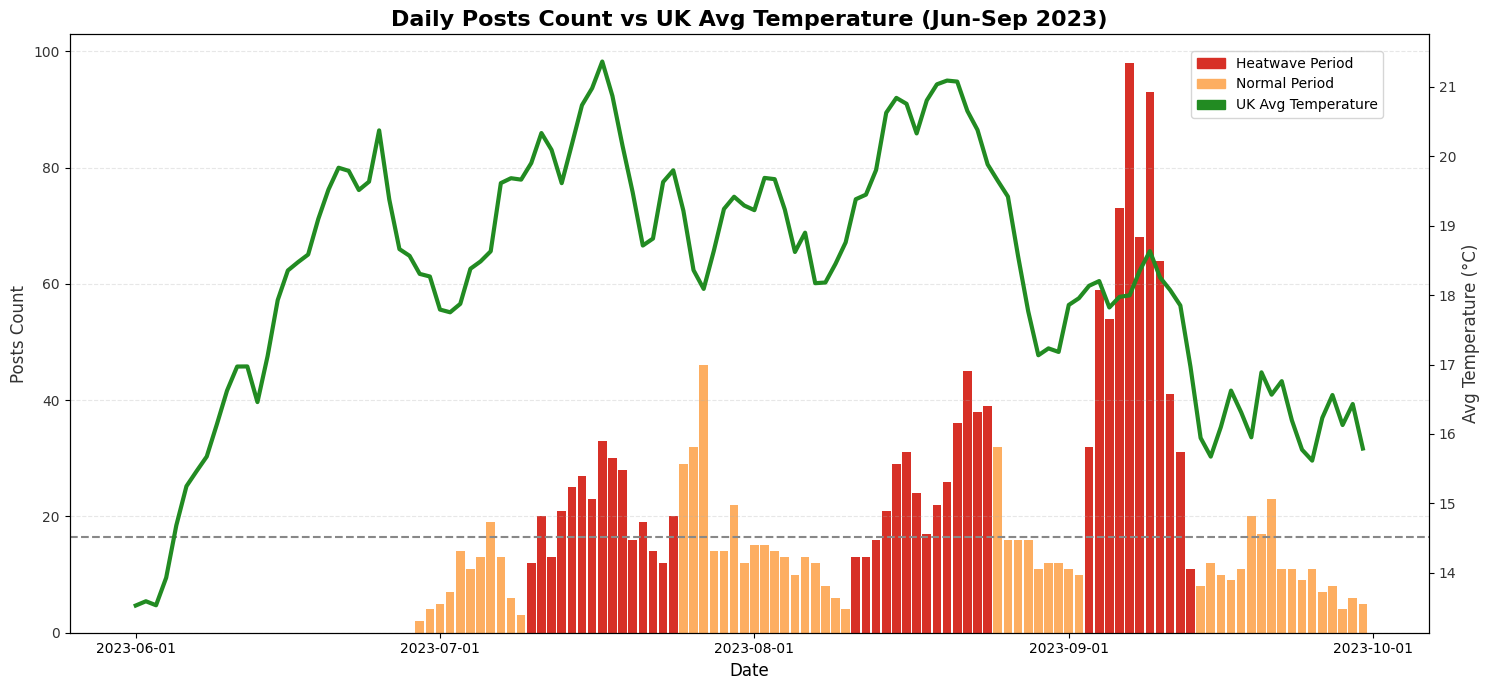

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict
import matplotlib.patches as mpatches  # For custom legend items

# 1. Load daily post frequency data
def load_posts_data(filepath):
    daily_counts = defaultdict(int)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%f%z")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError, ValueError):
                continue
    return daily_counts

# 2. Load temperature data (UK only)
def load_temperature_data(filepath, region_name):
    df_temp = pd.read_csv(filepath, parse_dates=['date'])
    df_temp.set_index('date', inplace=True)
    df_temp = df_temp.rename(columns={'avg_temp': region_name})
    df_temp = df_temp.sort_index()
    return df_temp.loc['2024-06-01':'2024-09-30']

# 3. File paths
posts_filepath = '/content/heat_posts2024_standardized.jsonl'
uk_filepath = '/content/europe_avg_temperature_2023_Jun-Oct.csv'

# 4. Process post data
daily_counts = load_posts_data(posts_filepath)
df_posts = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['posts_count'])
df_posts.index = pd.to_datetime(df_posts.index)
full_date_range = pd.date_range(start='2024-06-01', end='2024-09-30', freq='D')
df_posts = df_posts.reindex(full_date_range, fill_value=0)
posts_avg = df_posts['posts_count'].mean()

# 5. Load UK temperature data
df_uk = load_temperature_data(uk_filepath, 'UK')

]
heatwave_dates = set()
for start, end in heatwave_periods:
    heatwave_dates.update(pd.date_range(start=start, end=end))

# 7. Set bar colors: red for heatwave days, tan for normal days
bar_colors = ['#FF0000' if date in heatwave_dates else '#D9A066' for date in df_posts.index]

# 8. Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar chart: daily post counts with color-coded bars
ax1.bar(df_posts.index, df_posts['posts_count'], color=bar_colors, label='Posts Count', width=0.85)
ax1.axhline(posts_avg, color='#888888', linestyle='--', linewidth=1.5, label=f'Avg Posts ({posts_avg:.1f})')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Posts Count', color='#333333', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#333333')

# Line chart: UK average temperature
ax2 = ax1.twinx()
ax2.plot(df_uk.index, df_uk['UK'], color='#C0392B', linewidth=2.8, label='UK Temp (°C)')
ax2.set_ylabel('Avg Temperature (°C)', color='#333333', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#333333')

# Title and custom legend
plt.title('Daily Posts Count vs UK Avg Temperature (Jun–Sep 2024)', fontsize=16, fontweight='bold')
heat_patch = mpatches.Patch(color='#FF0000', label='Heatwave Period')
normal_patch = mpatches.Patch(color='#D9A066', label='Normal Period')
avg_line = mpatches.Patch(color='#888888', label=f'Average Posts ({posts_avg:.1f})')
fig.legend(handles=[heat_patch, normal_patch, avg_line], loc='upper right', bbox_to_anchor=(0.91, 0.91))

# Format x-axis to show month/day
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Grid and layout
ax1.grid(axis='y', linestyle='--', alpha=0.3)
fig.tight_layout()

# Display the plot
plt.show()


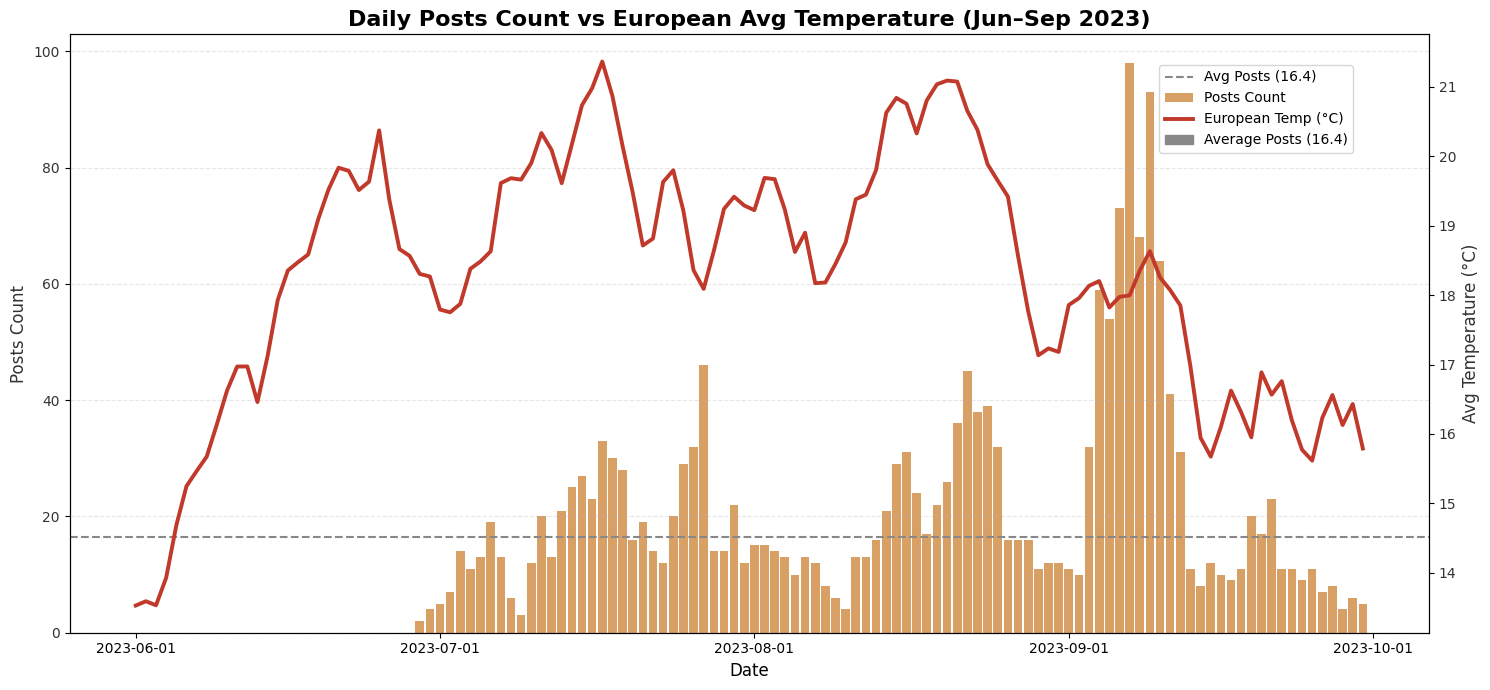

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict
import matplotlib.patches as mpatches

# 1. Load daily post frequency data
def load_posts_data(filepath):
    daily_counts = defaultdict(int)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%f%z")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError, ValueError):
                continue
    return daily_counts

# 2. Load temperature data (European only)
def load_temperature_data(filepath, region_name):
    df_temp = pd.read_csv(filepath, parse_dates=['date'])
    df_temp.set_index('date', inplace=True)
    df_temp = df_temp.rename(columns={'avg_temp': region_name})
    df_temp = df_temp.sort_index()
    return df_temp.loc['2023-06-01':'2023-09-30']

# 3. File paths
posts_filepath = '/content/heat_posts2023.jsonl'
europe_filepath = '/content/europe_avg_temperature_2023_Jun-Oct.csv'

# 4. Process post data
daily_counts = load_posts_data(posts_filepath)
df_posts = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['posts_count'])
df_posts.index = pd.to_datetime(df_posts.index)
full_date_range = pd.date_range(start='2023-06-01', end='2023-09-30', freq='D')
df_posts = df_posts.reindex(full_date_range, fill_value=0)
posts_avg = df_posts['posts_count'].mean()

# 5. Load European temperature data
df_europe = load_temperature_data(europe_filepath, 'European')

# 6. Use a single color for all bars (no heatwave differentiation)
bar_color = '#D9A066'  # Light brown
bar_colors = [bar_color] * len(df_posts)

# 7. Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar chart: daily post counts
ax1.bar(df_posts.index, df_posts['posts_count'], color=bar_colors, label='Posts Count', width=0.85)
ax1.axhline(posts_avg, color='#888888', linestyle='--', linewidth=1.5, label=f'Avg Posts ({posts_avg:.1f})')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Posts Count', color='#333333', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#333333')

# Line chart: European average temperature
ax2 = ax1.twinx()
ax2.plot(df_europe.index, df_europe['European'], color='#C0392B', linewidth=2.8, label='European Temp (°C)')
ax2.set_ylabel('Avg Temperature (°C)', color='#333333', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#333333')

# Title and legend
plt.title('Daily Posts Count vs European Avg Temperature (Jun–Sep 2023)', fontsize=16, fontweight='bold')
avg_line = mpatches.Patch(color='#888888', label=f'Average Posts ({posts_avg:.1f})')


# Format x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Grid and layout
ax1.grid(axis='y', linestyle='--', alpha=0.3)
fig.tight_layout()
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(handles=lines_1 + lines_2 + [avg_line], labels=labels_1 + labels_2 + [avg_line.get_label()], loc='upper right', bbox_to_anchor=(0.91, 0.91))

# Show plot
plt.show()

# 7.Europe 2024: Temp vs. Post Frequency

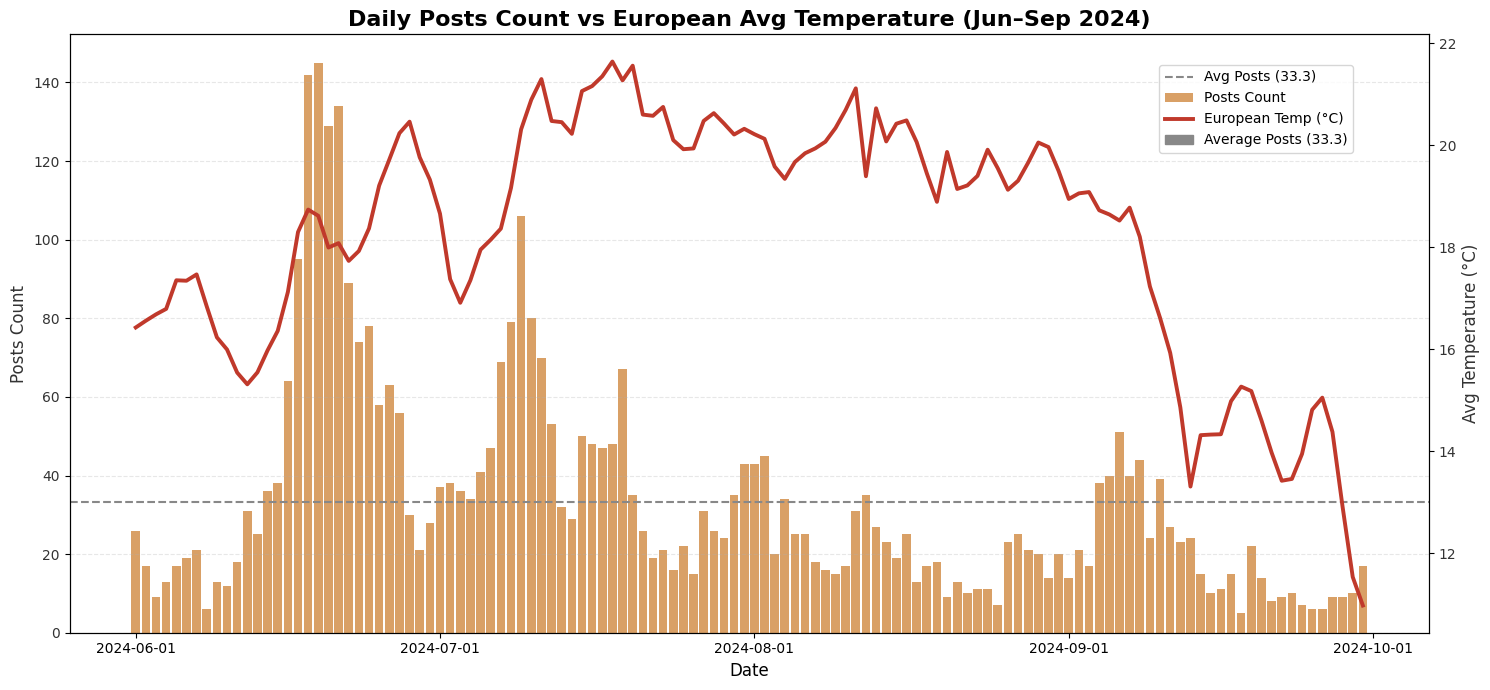

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict
import matplotlib.patches as mpatches

# 1. Load daily post frequency data
def load_posts_data(filepath):
    daily_counts = defaultdict(int)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%f%z")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError, ValueError):
                continue
    return daily_counts

# 2. Load temperature data
def load_temperature_data(filepath, region_name):
    df_temp = pd.read_csv(filepath, parse_dates=['date'])
    df_temp.set_index('date', inplace=True)
    df_temp = df_temp.rename(columns={'avg_temp': region_name})
    df_temp = df_temp.sort_index()
    return df_temp.loc['2024-06-01':'2024-09-30']

# 3. File paths
posts_filepath = '/content/heat_posts2024_standardized.jsonl'
europe_filepath = '/content/europe_avg_temperature_2024_Jun-Oct.csv'

# 4. Process post data
daily_counts = load_posts_data(posts_filepath)
df_posts = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['posts_count'])
df_posts.index = pd.to_datetime(df_posts.index)
full_date_range = pd.date_range(start='2024-06-01', end='2024-09-30', freq='D')
df_posts = df_posts.reindex(full_date_range, fill_value=0)
posts_avg = df_posts['posts_count'].mean()

# 5. Load European temperature data
df_europe = load_temperature_data(europe_filepath, 'European')

# 6. Use a single color for all bars (no heatwave differentiation)
bar_color = '#D9A066'  # Light brown
bar_colors = [bar_color] * len(df_posts)

# 7. Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar chart: daily post counts
ax1.bar(df_posts.index, df_posts['posts_count'], color=bar_colors, label='Posts Count', width=0.85)
ax1.axhline(posts_avg, color='#888888', linestyle='--', linewidth=1.5, label=f'Avg Posts ({posts_avg:.1f})')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Posts Count', color='#333333', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#333333')

# Line chart: Average temperature
ax2 = ax1.twinx()
ax2.plot(df_europe.index, df_europe['European'], color='#C0392B', linewidth=2.8, label='European Temp (°C)')
ax2.set_ylabel('Avg Temperature (°C)', color='#333333', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#333333')

# Title and legend
plt.title('Daily Posts Count vs European Avg Temperature (Jun–Sep 2024)', fontsize=16, fontweight='bold')
avg_line = mpatches.Patch(color='#888888', label=f'Average Posts ({posts_avg:.1f})')


# Format x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Grid and layout
ax1.grid(axis='y', linestyle='--', alpha=0.3)
fig.tight_layout()
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
fig.legend(handles=lines_1 + lines_2 + [avg_line], labels=labels_1 + labels_2 + [avg_line.get_label()], loc='upper right', bbox_to_anchor=(0.91, 0.91))
# Show plot
plt.show()

# 8.USA 2024: Temp vs. Post Frequency

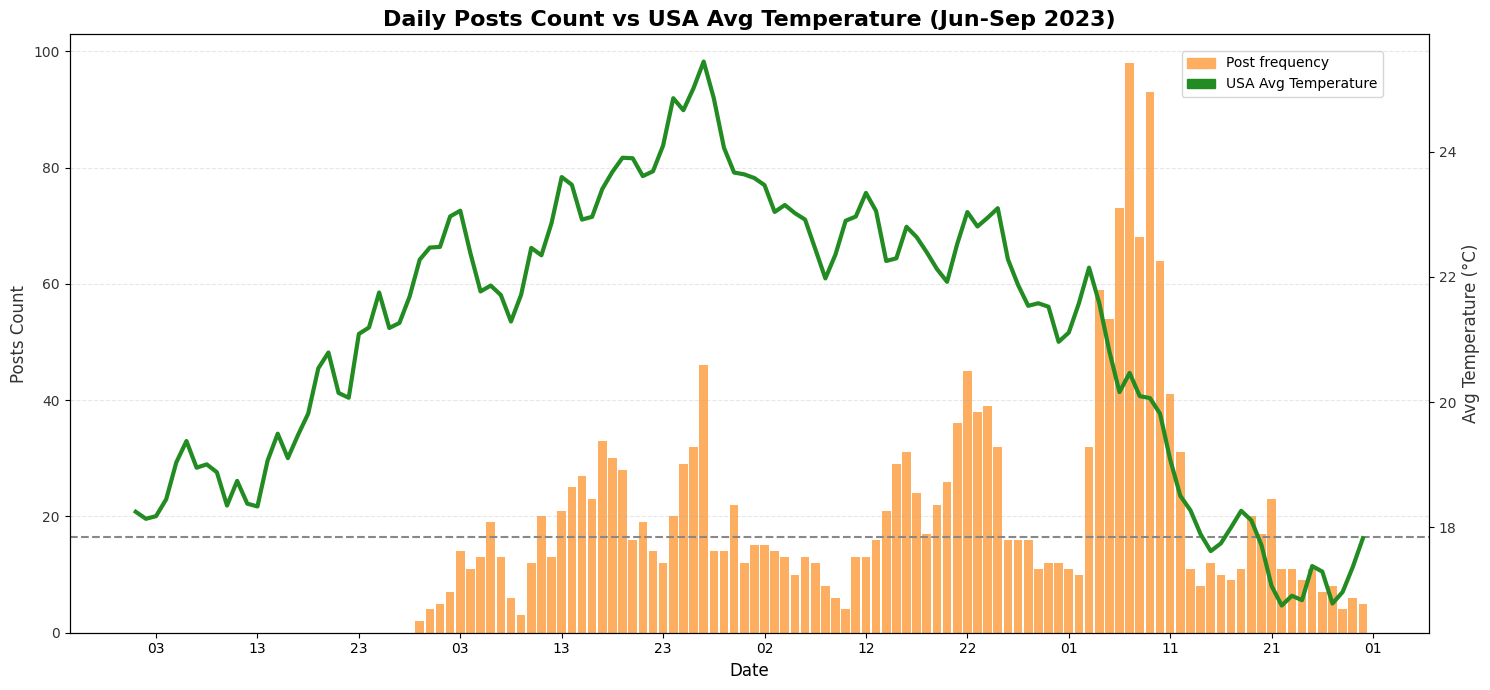

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict
import matplotlib.patches as mpatches

# 1. Load daily post frequency data
def load_posts_data(filepath):
    daily_counts = defaultdict(int)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%f%z")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError, ValueError):
                continue
    return daily_counts

# 2. Load temperature data
def load_temperature_data(filepath, region_name):
    df_temp = pd.read_csv(filepath, parse_dates=['date'])
    df_temp.set_index('date', inplace=True)
    df_temp = df_temp.rename(columns={'avg_temp': region_name})
    df_temp = df_temp.sort_index()
    return df_temp.loc['2023-06-01':'2023-09-30']

# 3. File paths
posts_filepath = '/content/heat_posts2023.jsonl'
uk_filepath = '/content/usa_avg_temperature_2023_Jun-Oct.csv'

# 4. Process post data
daily_counts = load_posts_data(posts_filepath)
df_posts = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['posts_count'])
df_posts.index = pd.to_datetime(df_posts.index)
full_date_range = pd.date_range(start='2023-06-01', end='2023-09-30', freq='D')
df_posts = df_posts.reindex(full_date_range, fill_value=0)
posts_avg = df_posts['posts_count'].mean()

# 5. Load USA temperature data
df_uk = load_temperature_data(uk_filepath, 'UK')


# 6. Use a single color for all bars (no heatwave differentiation)
bar_colors = ['#FDAE61'] * len(df_posts)

# 7. Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar chart: daily post counts
ax1.bar(df_posts.index, df_posts['posts_count'], color=bar_colors, label='Posts Count', width=0.85)
ax1.axhline(posts_avg, color='#888888', linestyle='--', linewidth=1.5, label=f'Avg Posts ({posts_avg:.1f})')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Posts Count', color='#333333', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#333333')

# Line chart: Average temperature
ax2 = ax1.twinx()
ax2.plot(df_uk.index, df_uk['UK'], color='#228B22', linewidth=3, label='USA Temp (°C)')
ax2.set_ylabel('Avg Temperature (°C)', color='#333333', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#333333')

# Title and legend
plt.title('Daily Posts Count vs USA Avg Temperature (Jun-Sep 2023)', fontsize=16, fontweight='bold')
avg_line = mpatches.Patch(color='#FDAE61', label='Post frequency')
temp_line = mpatches.Patch(color='#228B22', label='USA Avg Temperature')
fig.legend(handles=[avg_line, temp_line], loc='upper right', bbox_to_anchor=(0.93, 0.93))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.xticks(rotation=0)
ax1.grid(axis='y', linestyle='--', alpha=0.3)
fig.tight_layout()
plt.show()


# 9.USA 2024: Temp vs. Post Frequency

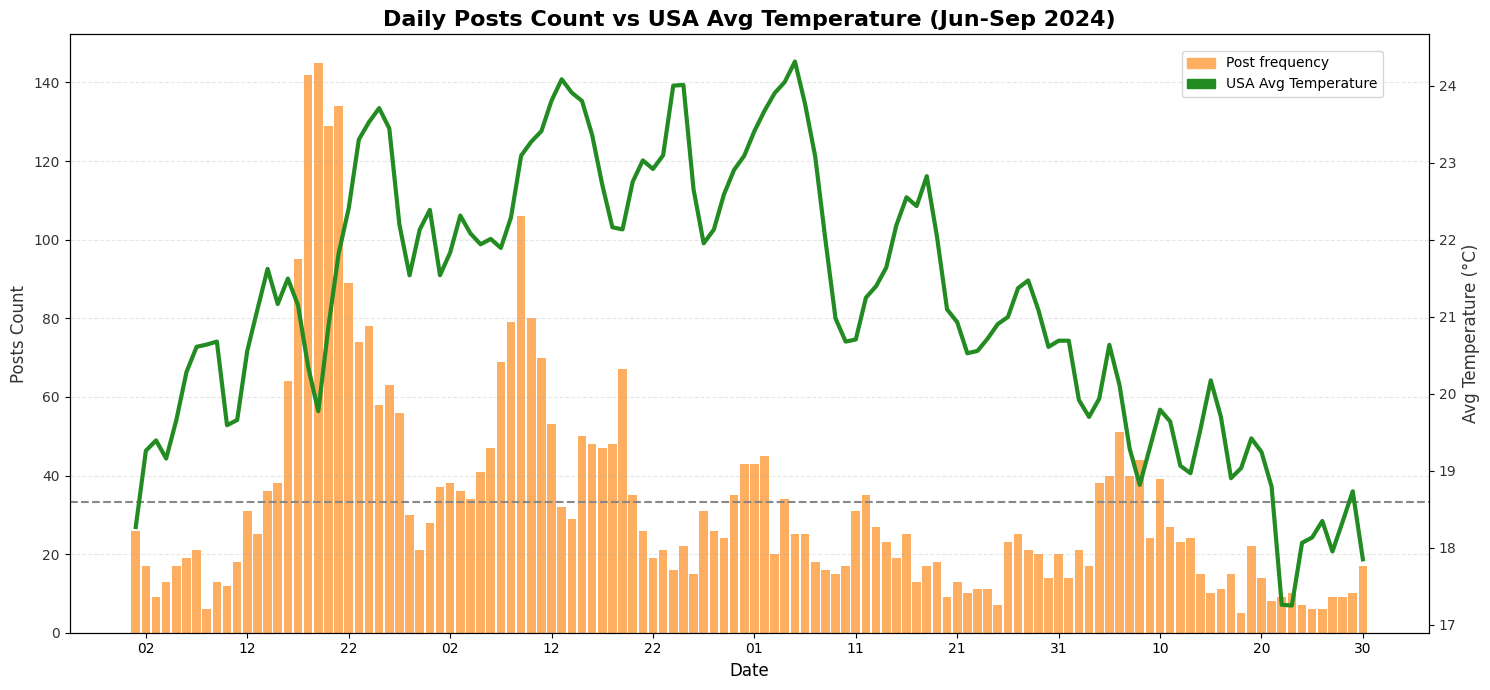

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime
from collections import defaultdict
import matplotlib.patches as mpatches

# 1. Load daily post frequency data
def load_posts_data(filepath):
    daily_counts = defaultdict(int)
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                post = json.loads(line)
                dt = datetime.strptime(post['created_at'], "%Y-%m-%dT%H:%M:%S.%f%z")
                date_str = dt.strftime("%Y-%m-%d")
                daily_counts[date_str] += 1
            except (json.JSONDecodeError, KeyError, ValueError):
                continue
    return daily_counts

# 2. Load temperature data
def load_temperature_data(filepath, region_name):
    df_temp = pd.read_csv(filepath, parse_dates=['date'])
    df_temp.set_index('date', inplace=True)
    df_temp = df_temp.rename(columns={'avg_temp': region_name})
    df_temp = df_temp.sort_index()
    return df_temp.loc['2024-06-01':'2024-09-30']

# 3. File paths
posts_filepath = '/content/heat_posts2024_standardized.jsonl'
uk_filepath = '/content/usa_avg_temperature_2024_Jun-Oct.csv'

# 4. Process post data
daily_counts = load_posts_data(posts_filepath)
df_posts = pd.DataFrame.from_dict(daily_counts, orient='index', columns=['posts_count'])
df_posts.index = pd.to_datetime(df_posts.index)
full_date_range = pd.date_range(start='2024-06-01', end='2024-09-30', freq='D')
df_posts = df_posts.reindex(full_date_range, fill_value=0)
posts_avg = df_posts['posts_count'].mean()

# 5. Load USA temperature data
df_uk = load_temperature_data(uk_filepath, 'UK')


# 6. Use a single color for all bars (no heatwave differentiation)
bar_colors = ['#FDAE61'] * len(df_posts)

# 7. Plotting
fig, ax1 = plt.subplots(figsize=(15, 7))

# Bar chart: daily post counts
ax1.bar(df_posts.index, df_posts['posts_count'], color=bar_colors, label='Posts Count', width=0.85)
ax1.axhline(posts_avg, color='#888888', linestyle='--', linewidth=1.5, label=f'Avg Posts ({posts_avg:.1f})')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Posts Count', color='#333333', fontsize=12)
ax1.tick_params(axis='y', labelcolor='#333333')

# Line chart: Average temperature
ax2 = ax1.twinx()
ax2.plot(df_uk.index, df_uk['UK'], color='#228B22', linewidth=3, label='UK Temp (°C)')
ax2.set_ylabel('Avg Temperature (°C)', color='#333333', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#333333')

# Title and legend
plt.title('Daily Posts Count vs USA Avg Temperature (Jun-Sep 2024)', fontsize=16, fontweight='bold')
avg_line = mpatches.Patch(color='#FDAE61', label='Post frequency')
temp_line = mpatches.Patch(color='#228B22', label='USA Avg Temperature')
fig.legend(handles=[avg_line, temp_line], loc='upper right', bbox_to_anchor=(0.93, 0.93))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.xticks(rotation=0)
ax1.grid(axis='y', linestyle='--', alpha=0.3)
fig.tight_layout()
plt.show()
